In [5]:
import os
import random
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns

# Gather your data

In [6]:
public_complaints = pd.read_csv('./Total_Public_Complaints_ASR_PCF_TBL_001.csv', index_col=0)
public_complaints.head()

,Year,Type,Subtype,Count_,ObjectId
Index_,,,,,
1,2019,Investigated Complaints,Conduct - Less Serious,245,1
2,2019,Investigated Complaints,Conduct - Serious,17,2
3,2019,Investigated Complaints,Policy,2,3
4,2019,Investigated Complaints,Service,24,4
5,2019,Not Investigated Complaints,Better dealt in Other Law,34,5


In [7]:
adf=public_complaints[['Subtype','Count_']]
adf.head()

,Subtype,Count_
Index_,,
1,Conduct - Less Serious,245
2,Conduct - Serious,17
3,Policy,2
4,Service,24
5,Better dealt in Other Law,34


In [27]:
#Serious_complaints 
Serious_complaints  = adf[adf['Subtype'] == 'Conduct - Serious']['Count_'].to_list()
#Other_law
Other_law= adf[adf['Subtype'] == 'Better dealt in Other Law']['Count_'].to_list()


### Conduct analysis of the distribution

In [28]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(Serious_complaints,Other_law):
    #calculate the sample size
    n1, n2 = len(Serious_complaints), len(Other_law)
    #calculate the variances
    var1, var2 = np.var(Serious_complaints, ddof=1), np.var(Other_law, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [29]:
# function to calculate Cohen's d for independent samples
def Cohens_d(Serious_complaints, Other_law):
    u1, u2 = np.mean(Serious_complaints), np.mean(Other_law)
    s_pooled = pooled_standard_deviation(Serious_complaints, Other_law)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

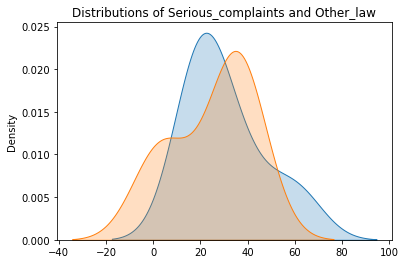

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(Serious_complaints, shade=True)
sns.kdeplot(Other_law, shade=True)
plt.title("Distributions of Serious_complaints and Other_law")
plt.show()

### Demonstration of a-priori Power 

In [31]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(Serious_complaints, Other_law, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
###P-Value:0.03676197560784152 T-Statistic:2.2558497877562798

P-Value:0.5799919849762064 T-Statistic:0.5719486540255988


In [32]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(Serious_complaints,Other_law)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)
###Sample Size: 16.442

Effect size is 0.3302147093643237
Sample Size: 144.927


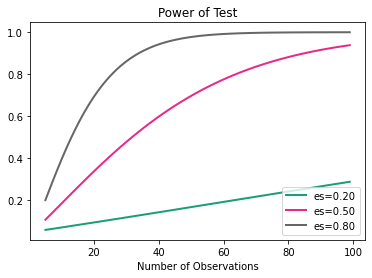

In [34]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()